# Arboles de decision


## Preparacion

### Cargar Librerias

In [17]:
# cargar librerias
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import seaborn as sns
import numpy as np



from pandas import read_csv
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree








### Importar datos y definir variables

In [48]:
url=r"C:\Users\ferna\Documents\Master\AI\Tarea1\pima-indians-diabetes.csv"
#url = "https://www.openml.org/data/get_csv/61/dataset_61_iris.arff"
dataset= read_csv(url)
Columna_a_predecir= 'diabetes'

### Limpiar datos (Solo ejecutar lo aplicable)

In [4]:
# Tratar ceros que son Nulos

import numpy as np
from numpy import nan

cols=['concentracionGlucosa','presionArterialSistolica','pliegueCutaneo', 'insulinaSerica','IMC'] 
dataset[cols] = dataset[cols].replace({'0':np.nan, 0:np.nan})
# Contar el número de nan por columna
print(dataset.isnull().sum())


nEmbarazos                    0
concentracionGlucosa          5
presionArterialSistolica     35
pliegueCutaneo              227
insulinaSerica              374
IMC                          11
funcionPediDiabe              0
edad                          0
diabetes                      0
dtype: int64


In [9]:
# Tratar datos faltantes

"""
# Interpoacion lineal
dataset=dataset.interpolate(method ='linear', limit_direction ='forward')
display('Verificación de datos faltantes : {0}'.format(dataset.isnull().sum().max()))
"""

"""
# Rellena valores faltantes con la media de la columna
dataset=dataset.fillna(dataset.mean())
display('Verificación de datos faltantes : {0}'.format(dataset.isnull().sum().max()))
"""

"""
# Elimina las filas con mas del 25% de valores faltantes 
dataset=dataset.copy()
perc = 25.0 # mayor al 25% de valores faltantes
min_count =  int(((100-perc)/100)*dataset.shape[0] + 1)
dataset = dataset.dropna( axis=1,  thresh=min_count)
"""


'Verificación de datos faltantes : 0'

'\n# Elimina las filas con mas del 25% de valores faltantes \ndataset=dataset.copy()\nperc = 25.0 # mayor al 25% de valores faltantes\nmin_count =  int(((100-perc)/100)*dataset.shape[0] + 1)\ndataset = dataset.dropna( axis=1,  thresh=min_count)\n'

## Analizar datos

In [49]:
# mostramos un resumen estadístico de los datos
print(dataset.describe())

# distribución por clases
print()
print(dataset.groupby(Columna_a_predecir).size())


       nEmbarazos  concentracionGlucosa  presionArterialSistolica  \
count  768.000000            768.000000                768.000000   
mean     3.845052            120.894531                 69.105469   
std      3.369578             31.972618                 19.355807   
min      0.000000              0.000000                  0.000000   
25%      1.000000             99.000000                 62.000000   
50%      3.000000            117.000000                 72.000000   
75%      6.000000            140.250000                 80.000000   
max     17.000000            199.000000                122.000000   

       pliegueCutaneo  insulinaSerica         IMC  funcionPediDiabe  \
count      768.000000      768.000000  768.000000        768.000000   
mean        20.536458       79.799479   31.992578          0.471876   
std         15.952218      115.244002    7.884160          0.331329   
min          0.000000        0.000000    0.000000          0.078000   
25%          0.000000  

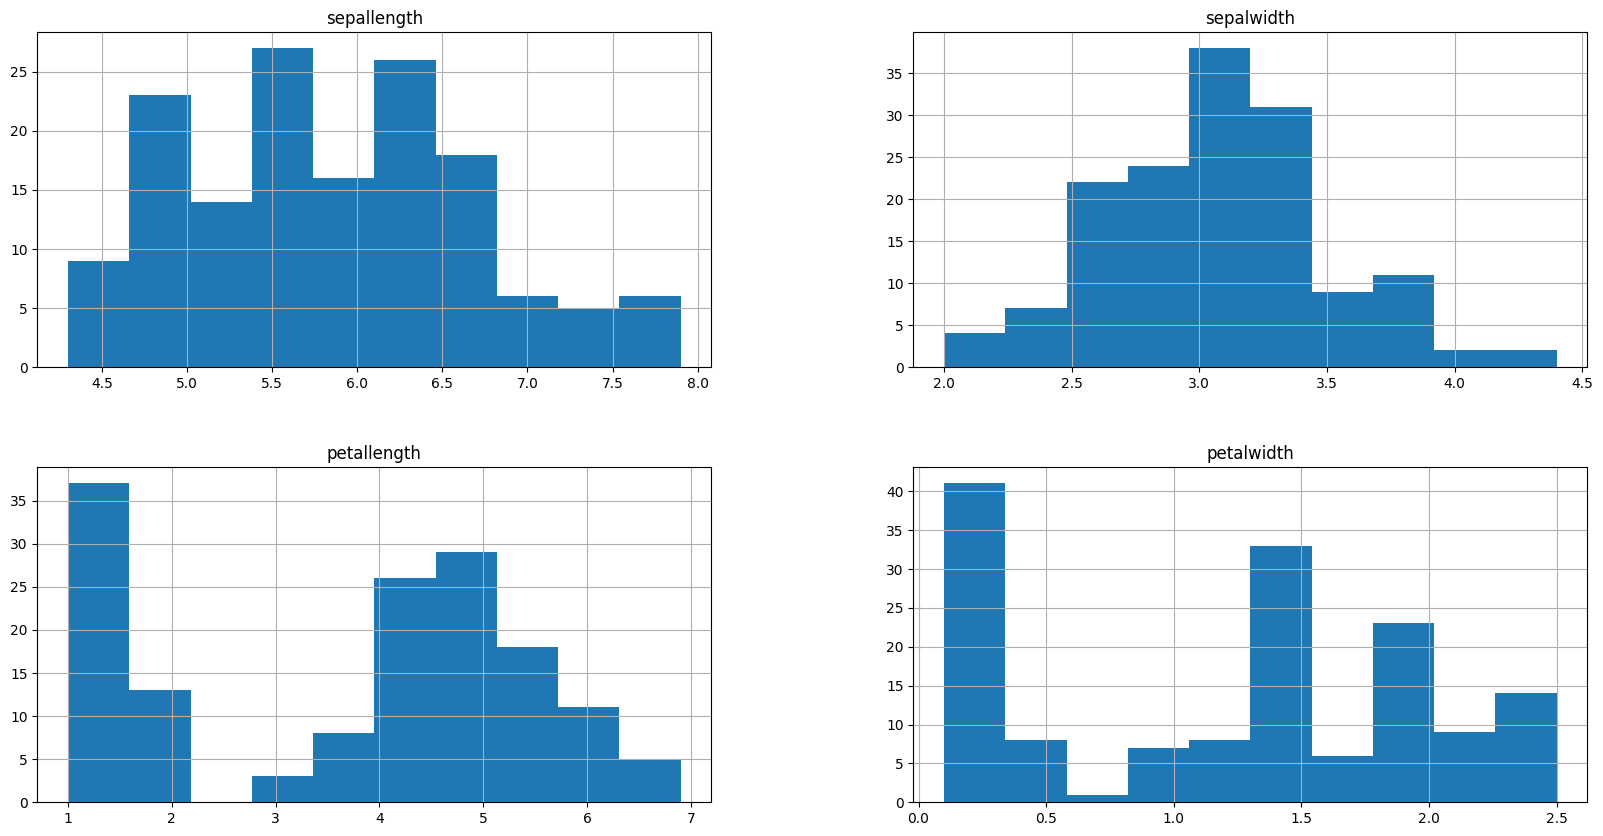

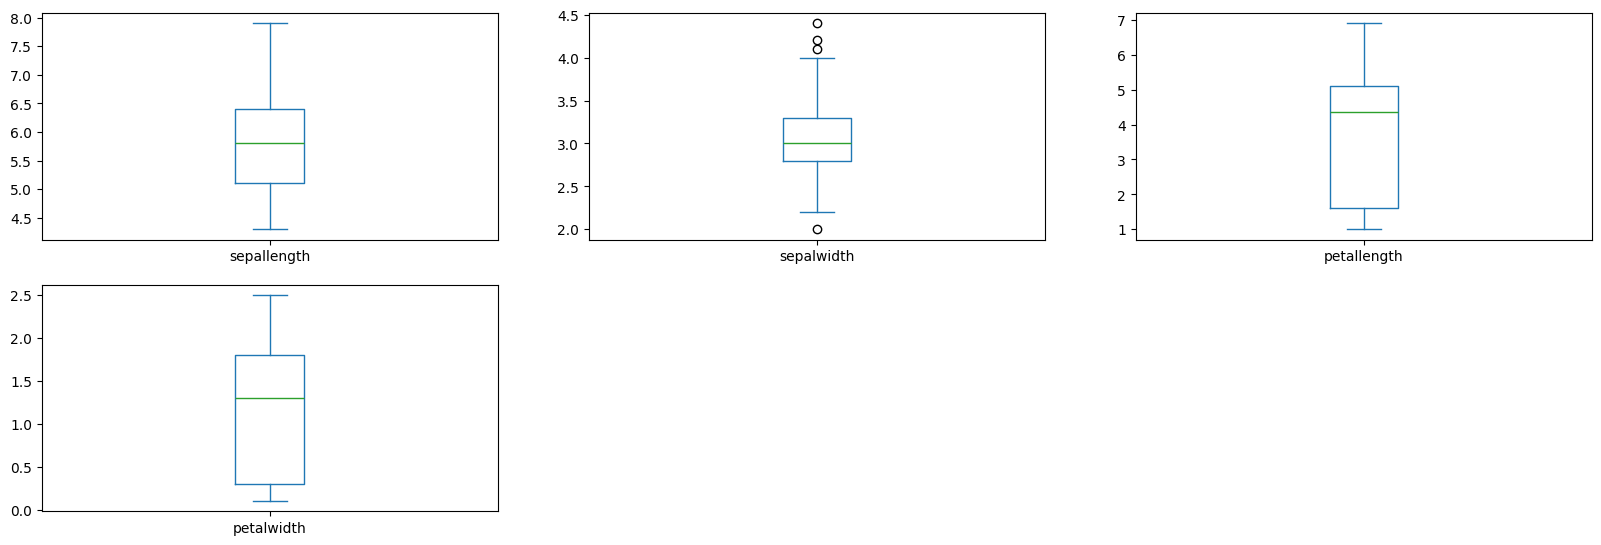

In [41]:

 # histogramas
plt.rcParams['figure.figsize'] = [20, 10];
dataset.hist()
plt.show()

# gráficos univariable:
 # diagramas de caja (box and whisker)
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()



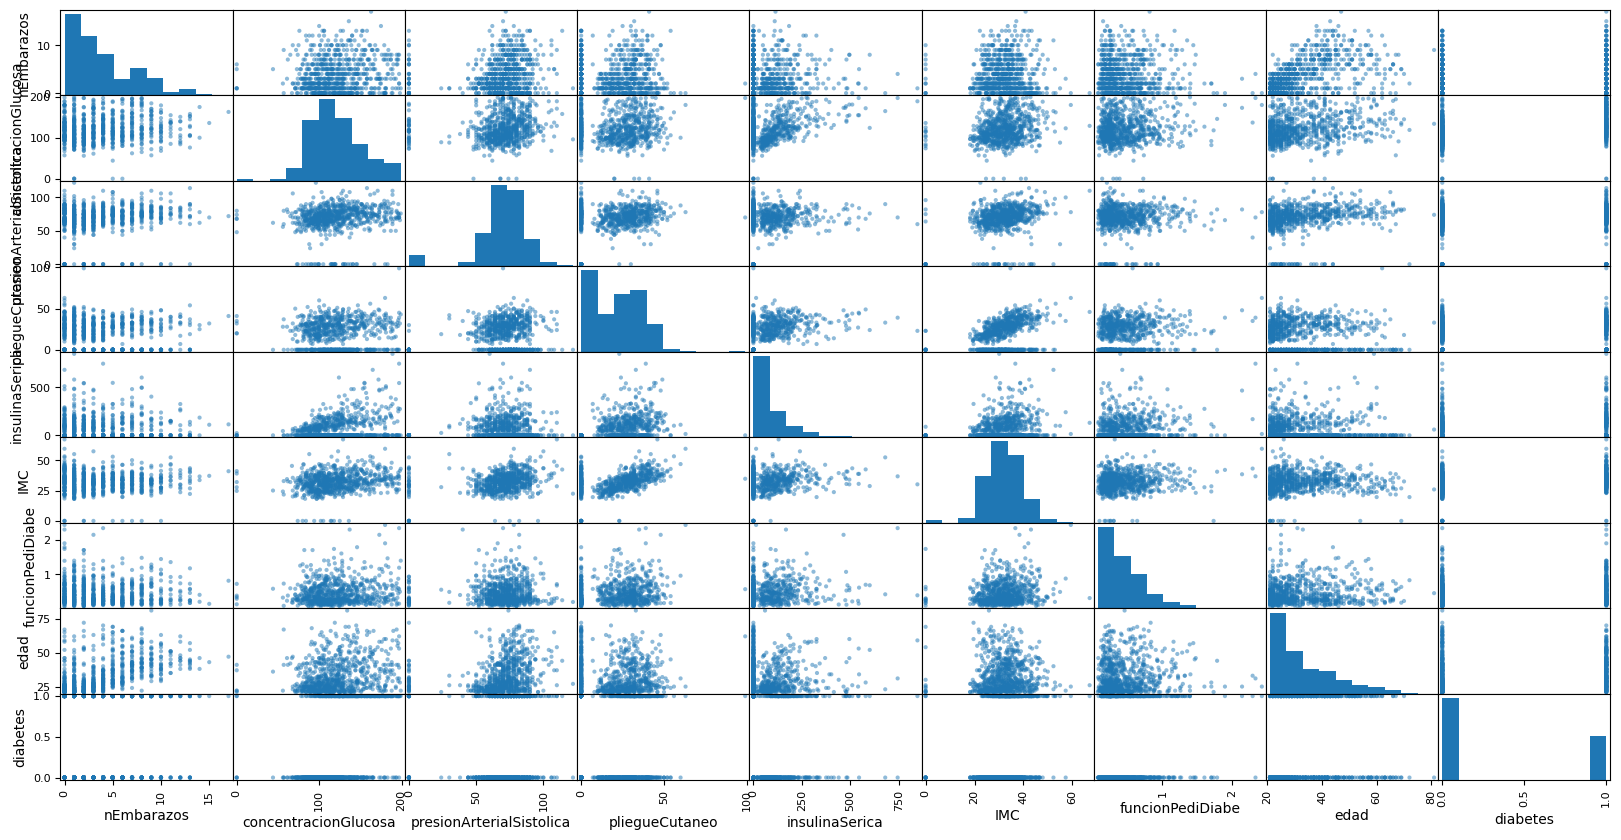

In [50]:


# gráficos multivariable
 # matriz de dispersión
scatter_matrix(dataset)
pyplot.show()



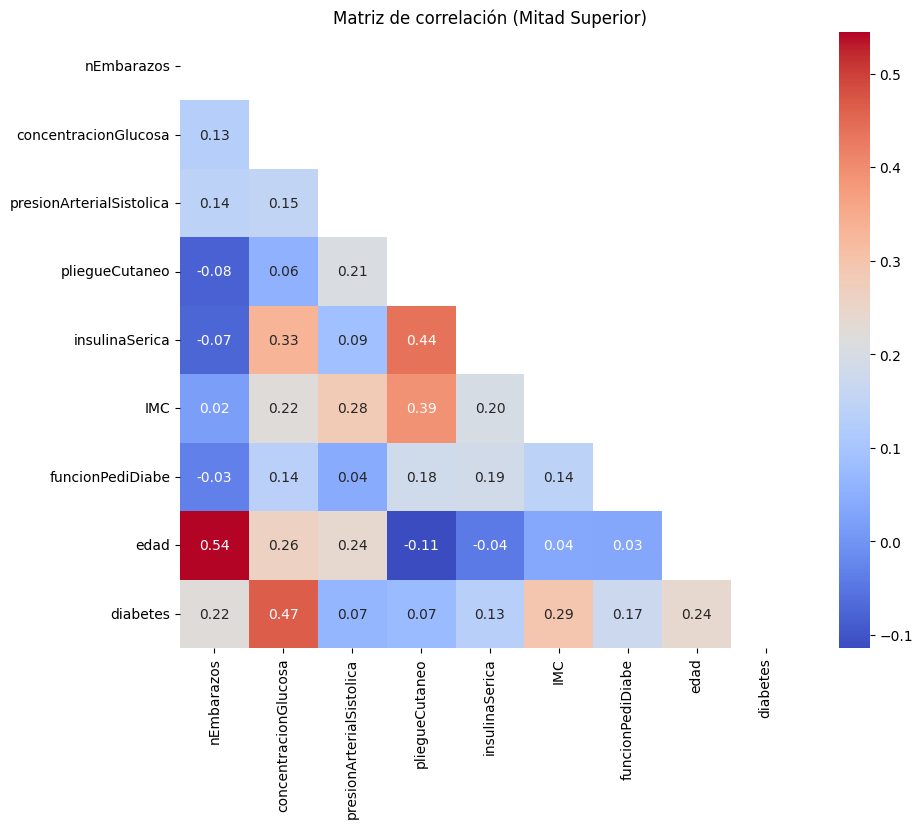

In [51]:


# Calcular la matriz de correlación
correlation_matrix = dataset.corr()

# Crear una máscara para la mitad superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear el mapa de calor usando seaborn, aplicando la máscara
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})

# Añadir título
plt.title('Matriz de correlación (Mitad Superior)')

# Mostrar el gráfico
plt.show()

## Dividir datos 

In [52]:
# Y= dato a precedir X= entrada de valores


y=dataset[Columna_a_predecir]
x=dataset.drop(columns=[Columna_a_predecir])

x_train,x_validation,y_train,y_validation = train_test_split(x,y,test_size=0.2,random_state=1,shuffle=True)

## Comparar modelos

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ferna\AppD

LR: 0.760682 (0.046971)
CART: 0.663115 (0.045363)
RandomForest: 0.742729 (0.050310)


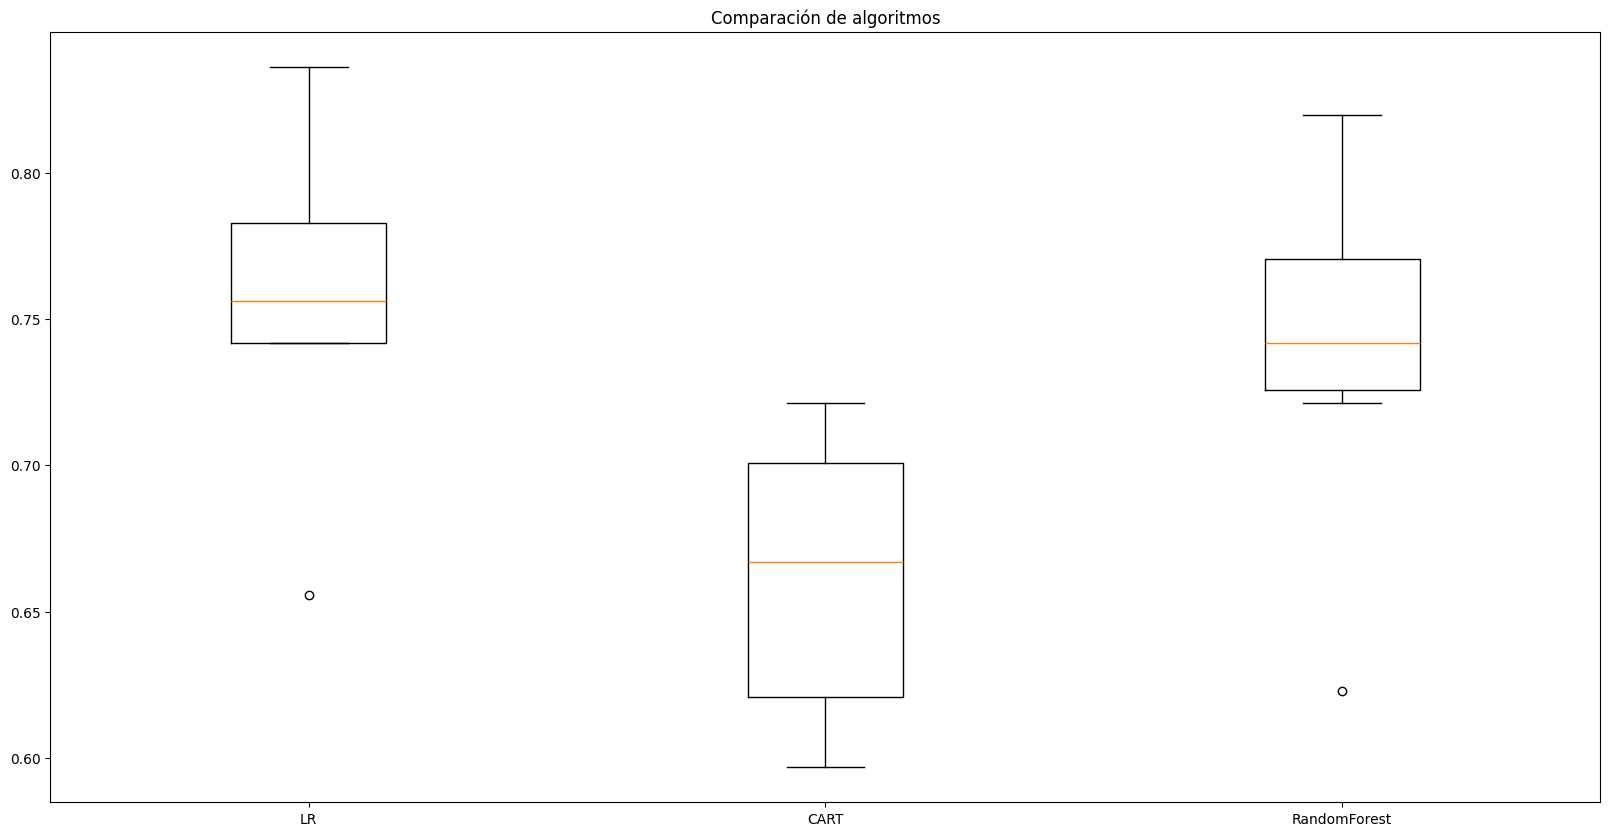

In [53]:
# Cargamos los algoritmos
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RandomForest',RandomForestClassifier()))

# Entrenar el modelo
#model.fit(X_train, y_train)))

# evaluamos cada modelo por turnos
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle= True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Comparación de algoritmos
pyplot.boxplot(results, tick_labels=names)
pyplot.title('Comparación de algoritmos')
pyplot.show()



## Entrenar modelo

### Decision Tree

In [54]:
# Realizamos predicciones con el dataset de validación
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# validar modelo
predictions = model.predict(x_validation)


### Random Forest

In [45]:
# Realizamos predicciones con el dataset de validación
model = RandomForestClassifier()
model.fit(x_train, y_train)

# validar modelo
predictions = model.predict(x_validation)

## Metricas/ Graficos del modelo

In [55]:
# Evaluamos las predicciones, en primer lugar la precisión obtenida
print("Accuracy score:")
print(accuracy_score(y_validation, predictions))

# ahora la matriz de confusión (vemos en este ejemplo que sólo hemos cometido un fallo)
print("\nConfusion matrix")
print(confusion_matrix(y_validation, predictions))

# y finalmente un informe de clasificación que ofrece un desglose de cada clase por precisión, 
print("\n Clasification report:")
print(classification_report(y_validation, predictions))


Accuracy score:
0.7012987012987013

Confusion matrix
[[77 22]
 [24 31]]

 Clasification report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        99
           1       0.58      0.56      0.57        55

    accuracy                           0.70       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.70      0.70       154



## Predecir

In [47]:
#csv_to_predict=r"C:\Users\ferna\Documents\Master\AI\Tarea1\pima-indians-diabetes.csv"
#datasetToPredict=read_csv(csv_to_predict)
datasetToPredict=[6.0, 3.0, 5.0, 2.0]


predictions=model.predict([datasetToPredict])
print(predictions)

['Iris-virginica']


c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
